# Introduction
<hr style="border:2px solid black"> </hr>


**What?** Prediction & confidence intervals via bootstrapping
    


# Theoretical recalls

## What is bootstrappig?


- Bootstrapping works even if we are dealing with an unconventional statistic with an unknown distribution. That makes it very general.
- Bootstrapping is the statistician’s slang for sampling with replacement. What we do is simply start with a sample, and then resample our sample a bunch of samples with replacement (to ensure independence), each having the same size as our original sample (so the bootstrapped samples will have duplicates).
- We can then compute our statistic for every bootstrapped sample and look at the distribution of these. As simple as that!
- The remarkable thing about bootstrapping is that the distribution of the bootstrapped statistics approximates the distribution of the sample statistics.  



## Quantile vs. percentile vs. quartile


## Definition:
**Percentile:** indicates the value below which a given percentage of observations in a group of observations 
            fall. Percentile rank is the proportion of values in a distribution that a particular value 
            is greater than or equal to. For example, if a pupil is taller than or as tall as 79% of his 
            classmates then the percentile rank of his height is 79, i.e. he is in the 79th percentile of 
            heights in his class.            
**Quantile:**  : the cut points dividing the range of probability distribution into continuous intervals 
            with equal probability. There are q-1 of q quantiles one of each k satisfying 0 < k < q.
            You can find any quantile by sorting the sample. The middle value of the sorted sample 
            (middle quantile, 50th percentile)
**Quartile:** a special case of quantile, in particular the 4-quantiles.

    
## Numerically:
0 quartile = 0    quantile = 0   percentile<br>
1 quartile = 0.25 quantile = 25  percentile<br>
2 quartile = 0.5  quantile = 50  percentile (median)<br>
3 quartile = 0.75 quantile = 75  percentile<br>
4 quartile = 1    quantile = 100 percentile<br>

## Pay attention about the bounds!
Percentiles go from 0 to 100 <br>
Quartiles go from 1 to 4 (or 0 to 4).<br>
Quantiles can go from anything to anything.<br>
Percentiles and quartiles are examples of quantiles. <br>



# Import modules

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor

# Get boostrapped statistics

In [2]:
def get_bootstrap_statistics(sample, statistic, nbootstraps):
    """Get bootstrap statistics

    Bootstrapping means sampling with replacement which leads to 
    better model performance because it decreases the variance of the model,
    without increasing the bias. If the samples were not replaced, it would 
    be impossible to obtain a sample with valus than the original set.


    original:
    [1000, 0, 545, 2100, 400, 1200, 500, 1200, 1500, 900]
    example of bootstraps (it may contain duplicated!):
    [ 400  900 2100 2100 1200  900  900  500  545 1200]
    [1200 1500 1000 2100 1000  500    0  545 1200 2100]
    [2100 1200  545 1200  400  500    0 2100  400 1500]
    [....]
    """

    bootstrap_statistics = np.empty(nbootstraps)

    for b in range(nbootstraps):
        resample = np.random.choice(sample, size=len(sample), replace=True)
        bootstrap_statistics[b] = statistic(resample)

    return bootstrap_statistics

# Confidence interval for the MEAN & MEDIAN via Boostrapped


- Let’s compute a bootstrapped CONFIDENCE interval for our samples. 
- The first step is to resample our data B many times and compute our desired statistic, which in our case is the mean but it can be any statics applicable to the whole population.
- We'll use B = 5000



In [109]:
def getCI(CI, bstats, populationStaticistName):
    """Get Confidence Interval (=CI)

    """

    alpha = CI
    lowerCI = np.percentile(bstats, (100-alpha)/2)
    upperCI = np.percentile(bstats, alpha+((100-alpha)/2))
    print("With a CI of: ", alpha, "% we get an interval for the " +
          populationStaticistName + " of: (lower,upper)", lowerCI, upperCI)
    return lowerCI, upperCI

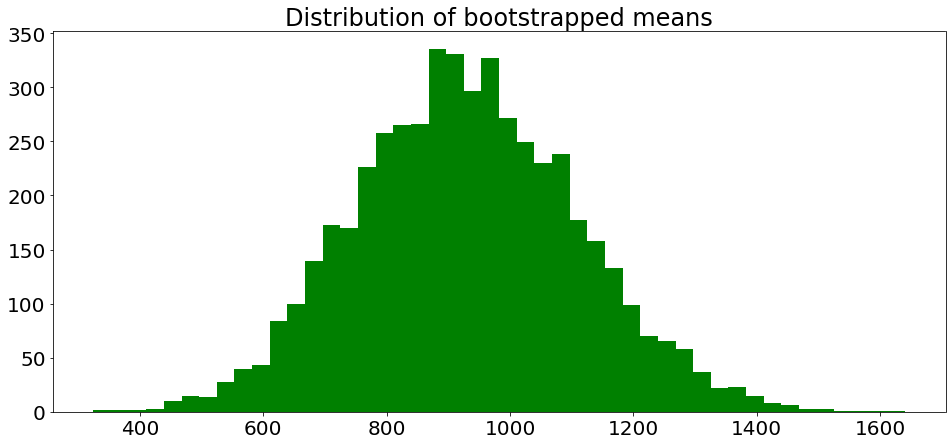

In [110]:
samples = [1000, 0, 545, 2100, 400, 1200, 500, 1200, 1500, 900]
staticsConsidered = np.mean
staticsConsideredStr = str(staticsConsidered)
bstats = get_bootstrap_statistics(samples, staticsConsidered, 5000)
plt.hist(bstats, color='green', bins='auto')
plt.title('Distribution of bootstrapped means')
plt.show()

In [111]:
lowerCI, upperCI = getCI(95, bstats, "mean")

With a CI of:  95 % we get an interval for the mean of: (lower,upper) 590.0 1294.5


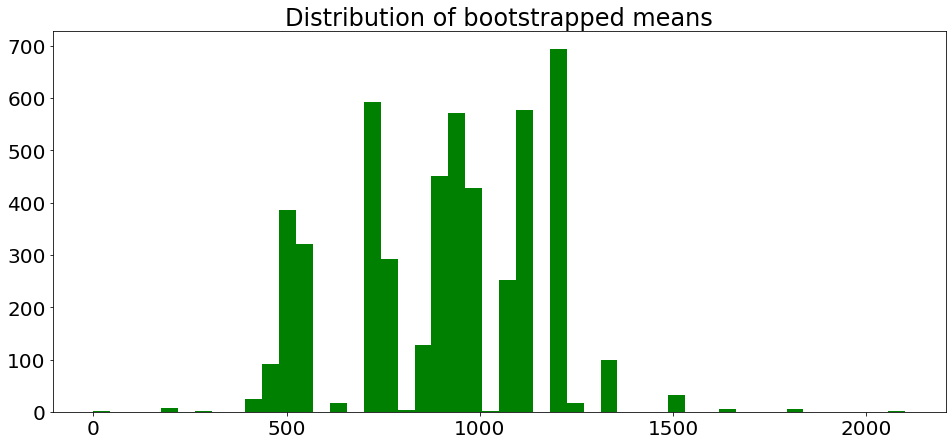

In [112]:
staticsConsidered = np.median
staticsConsideredStr = str(staticsConsidered)
bstats = get_bootstrap_statistics(samples, staticsConsidered, 5000)
plt.hist(bstats, color='green', bins='auto')
plt.title('Distribution of bootstrapped means')
plt.show()

In [7]:
lowerCI, upperCI = getCI(95, bstats, "median")

With a CI of:  95 % we get an interval for themedian of: (lower,upper) 472.5 1350.0


# Get the dataset


- Boston housing dataset.
- There is not particular reason for choosing this dataset other than the fact it is easy to manage.



In [8]:
boston = load_boston()
X = boston["data"]
Y = boston["target"]
size = len(boston["data"])
print(len(X), len(Y))

506 506


In [9]:
trainsize = 400
idx = list(range(size))
# shuffle the data
np.random.shuffle(idx)

In [10]:
X_train = X[idx[:trainsize]]
y_train = Y[idx[:trainsize]]
X_test = X[idx[trainsize:]]
y_test = Y[idx[trainsize:]]

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test[0].shape)

(400, 13)
(400,)
(13,)


# Fit a regression model


- At this stage we are not interested neirther in a particular model nor in a tuned model.
- We essentially need just a regression model!
- Nothing would stop from tuning the model.



In [13]:
# The mid model will use the default ls which predict the mean
model = GradientBoostingRegressor(n_estimators = 200, max_depth = 5, learning_rate = 0.01)

# Prediction interval via Boostrapping

In [113]:
def prediction_interval(model, X_train, y_train, x0, alpha, Nobootstrap=None):
    """
    Compute a prediction interval around the model's prediction of x0.

    INPUT
    model
      A predictive model with `fit` and `predict` methods
    X_train: numpy array of shape (n_samples, n_features)
      A numpy array containing the training input data
    y_train: numpy array of shape (n_samples,)
      A numpy array containing the training target data
    x0
      A new data point, of shape (n_features,)
    alpha: float = 0.05
      The prediction uncertainty

    OUTPUT
    A triple (`lower`, `pred`, `upper`) with `pred` being the prediction
    of the model and `lower` and `upper` constituting the lower- and upper
    bounds for the prediction interval around `pred`, respectively. 
    """

    # Number of training samples
    n = X_train.shape[0]

    if Nobootstrap == None:
        # No. of bootstrap samples as the square root of the No. of samples
        nbootstraps = np.sqrt(n).astype(int)
    else:
        nbootstraps = Nobootstrap

    print("No of bootstraps: ", nbootstraps)

    # Compute the m_i's and the validation residuals
    bootstrap_preds, val_residuals = np.empty(nbootstraps), []
    for b in range(nbootstraps):
        # This where each boostrapped sample is defined
        # replace = true allows for replacement
        train_idxs = np.random.choice(range(n), size=n, replace=True)
        val_idxs = np.array([idx for idx in range(n) if idx not in train_idxs])
        model.fit(X_train[train_idxs, :], y_train[train_idxs])
        preds = model.predict(X_train[val_idxs])
        val_residuals.append(y_train[val_idxs] - preds)

        """
        This model is not built for speed. If you loko carefully
        the only new piece of informaion provided by the user is 
        "x0" and it is being used in the line below. Whatever is
        done above can actually be done only once and not all the time.
        THIS IS A TO DO THING!
        """
        bootstrap_preds[b] = model.predict(x0)
    bootstrap_preds -= np.mean(bootstrap_preds)
    val_residuals = np.concatenate(val_residuals)

    # Compute the prediction and the training residuals
    model.fit(X_train, y_train)
    preds = model.predict(X_train)
    train_residuals = y_train - preds

    # Take percentiles of the training- and validation residuals to enable
    # comparisons between them
    val_residuals = np.percentile(val_residuals, q=np.arange(100))
    train_residuals = np.percentile(train_residuals, q=np.arange(100))

    # Compute the .632+ bootstrap estimate for the sample noise and bias
    no_information_error = np.mean(np.abs(np.random.permutation(y_train) -
                                          np.random.permutation(preds)))
    generalisation = np.abs(val_residuals.mean() - train_residuals.mean())
    no_information_val = np.abs(no_information_error - train_residuals)
    relative_overfitting_rate = np.mean(generalisation / no_information_val)
    weight = .632 / (1 - .368 * relative_overfitting_rate)
    residuals = (1 - weight) * train_residuals + weight * val_residuals

    # Construct the C set and get the percentiles
    C = np.array([m + o for m in bootstrap_preds for o in residuals])
    qs = [100 * alpha / 2, 100 * (1 - alpha / 2)]
    print("Lower and Upper percetiles: ", qs)
    percentiles = np.percentile(C, q=qs)
    print("percentiles", percentiles)
    return percentiles[0], model.predict(x0), percentiles[1]


- Now to estimate the PI we create a bootstrap sampling for each sample we want.
- Compare to the quantile loss function, we are not learning a model based but rather computing the variability at each sample.



In [114]:
X_train

array([[4.74100e-02, 0.00000e+00, 1.19300e+01, ..., 2.10000e+01,
        3.96900e+02, 7.88000e+00],
       [1.80846e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.72500e+01, 2.90500e+01],
       [2.76300e-02, 7.50000e+01, 2.95000e+00, ..., 1.83000e+01,
        3.95630e+02, 4.32000e+00],
       ...,
       [1.27440e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.85410e+02, 4.84000e+00],
       [1.49632e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        3.41600e+02, 1.32800e+01],
       [8.38700e-02, 0.00000e+00, 1.28300e+01, ..., 1.87000e+01,
        3.96060e+02, 9.10000e+00]])

In [55]:
# in percentage
CI = 95
# prediction uncertainty
alpha = 1 - CI/100
ID = 8
lower, pred, upper = prediction_interval(
    model, X_train, y_train, X_test[ID].reshape(1, -1), alpha)
print("lower", lower, "prediction", pred, "truth:", y_test[ID], "upper", upper)

No of bootstraps:  20
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.50919161  7.28251278]
lower -6.509191606616491 prediction [17.74528263] truth: 27.1 upper 7.282512778631794


In [57]:
pred[0]

17.745282627483842

the deltas are: 6.774402430946976 7.2628167514775726


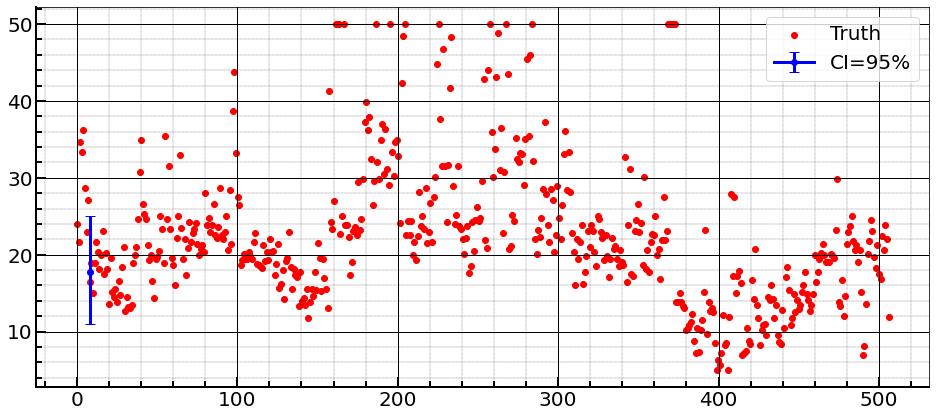

In [102]:
rcParams['figure.figsize'] = 16, 7
rcParams['font.size'] = 20

fig, ax = plt.subplots()

ax.scatter(np.linspace(0, len(Y), len(Y)), Y, c="r", label="Truth")
LOWER = -lower
UPPER = upper

print("the deltas are:", LOWER, UPPER)
ax.errorbar(ID, [pred], yerr=np.array([[LOWER, UPPER]]).T, fmt='bo-',
            solid_capstyle='projecting', capsize=5, lw=3, label="CI=" + str(CI)+"%")

ax.grid(which="major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which="minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which='major', direction='in', length=10, width=2)
ax.tick_params(which='minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.minorticks_on()

ax.legend()
plt.show()


- **How many bootstraps** do we need to corectly estimate the percentiles?
- This question should be asked for each sample points but it is not practicable because of its cost.
- From the figure below we can see that we can use also a very small number of bootstrap and the results woul not change muh
- One can also think in terms of CV, meaning you can CV this results, for instance taking the mean.



In [93]:
lowerAll_conv, predAll_conv, upperAll_conv = [], [], []
kk = np.sqrt(X_train.shape[0]).astype(int)
for i in np.arange(2, (kk + 1) * 2, 2):
    lower, pred, upper = prediction_interval(model,
                                             X_train,
                                             y_train,
                                             X_test[ID].reshape(1, -1),
                                             alpha,
                                             Nobootstrap=i)
    lowerAll_conv.append(lower)
    predAll_conv.append(pred[0])
    upperAll_conv.append(upper)

No of bootstraps:  2
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-5.62852151  7.6788266 ]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-5.96161622  8.39515433]
No of bootstraps:  6
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.5797819   6.88347317]
No of bootstraps:  8
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.86327622  6.52443118]
No of bootstraps:  10
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.55200173  6.56495945]
No of bootstraps:  12
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.47693078  7.29268961]
No of bootstraps:  14
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.97900786  6.75700153]
No of bootstraps:  16
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.33980845  7.24280892]
No of bootstraps:  18
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percent

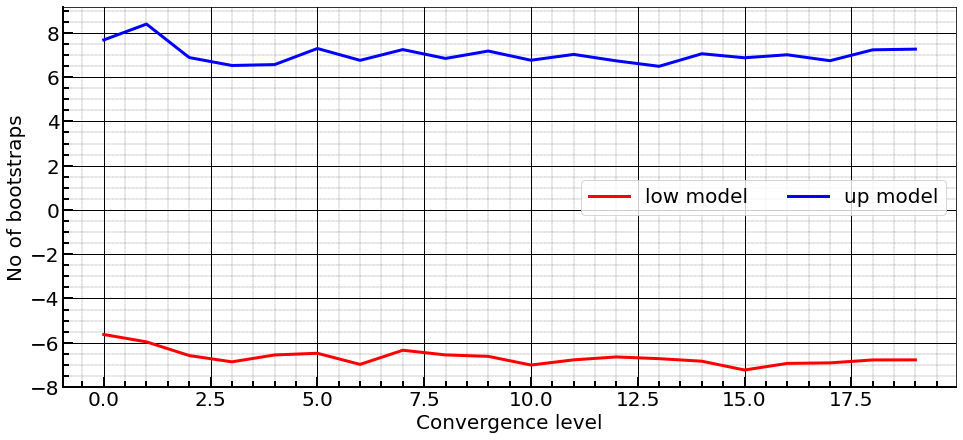

In [106]:
fig, ax = plt.subplots()
dummy = range(len(lowerAll_conv))

ax.plot(dummy, lowerAll_conv, c="r", lw=3, label="low model")
ax.plot(dummy, upperAll_conv, c="b", lw=3, label="up model")
# stay constant so no need to plot it
#ax.plot(dummy, predAll_conv, c = "k", label = "pred model")

ax.grid(which="major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which="minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which='major', direction='in', length=10, width=2)
ax.tick_params(which='minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.minorticks_on()

ax.set_ylabel("No of bootstraps")
ax.set_xlabel("Convergence level")
ax.legend(ncol=3)
plt.show()


- What if we want to estimate the value for each of the test data?
- If **Nobootstrap** is not provided the code currently use the sqrt(training sample).
- If you want to speed up the run time you can then provide an integer yourself.



In [51]:
lowerAll, predAll, upperAll = [], [], []
for i in range(len(X_test)):
    lower, pred, upper = prediction_interval(
        model, X_train, y_train, X_test[i].reshape(1, -1), alpha, Nobootstrap=4)
    lowerAll.append(lower)
    predAll.append(pred[0])
    upperAll.append(upper)

No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.24378204  7.0497953 ]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.97558967  6.64880707]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.55079427  6.44820325]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.46938242  7.04204085]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.12534854  6.07741103]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-7.60000495  7.06186997]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-5.80756798  7.26032166]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-7.33444232  5.94773336]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles 

Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.36396749  5.51247827]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-5.96951951  6.86904949]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.35927279  6.01347417]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.46629014  6.12058701]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-7.09336328  6.96207984]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-7.18106003  7.190474  ]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.43555812  5.74039248]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-7.8826562   8.28615099]
No of bootstraps:  4
Lower and Upper percetiles:  [2.500000000000002, 97.5]
percentiles [-6.31822295  7.05746

In [58]:
pred

array([17.74528263])

In [59]:
res = pd.DataFrame()
res['Truth'] = y_test
res['pred'] = predAll
res['low'] = lowerAll
res['up'] = upperAll
#res["ID"] = np.linspace(0,len(Y),len(Y))
res.sort_values(by=['pred'], inplace=True)

In [60]:
res

,Truth,pred,low,up
89,8.8,10.136541,-7.226643,5.565398
83,5.0,10.442044,-6.323829,7.270807
2,7.4,10.942315,-6.550794,6.448203
104,10.5,11.197811,-6.370828,6.265519
86,8.1,12.431331,-6.353798,6.782395
...,...,...,...,...
31,30.3,30.330329,-6.311464,6.134070
81,41.3,30.638368,-6.757394,6.666986
12,31.5,31.843557,-6.494163,6.935914
30,41.7,43.500138,-7.149051,6.673709


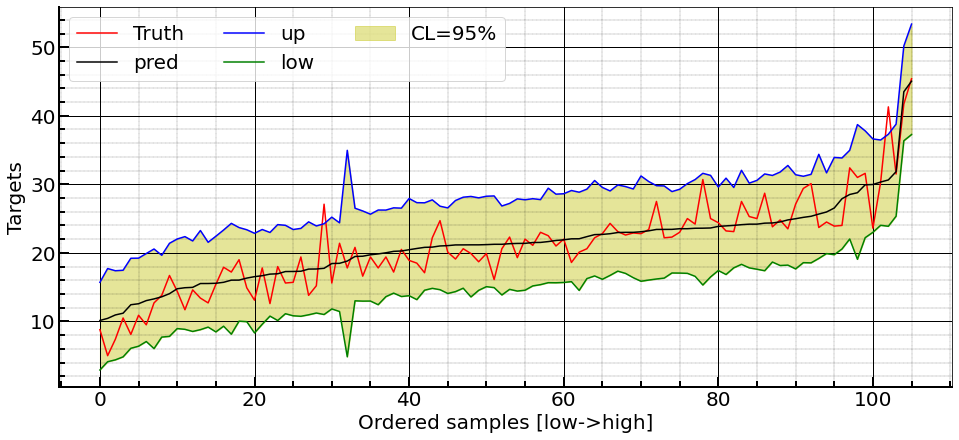

In [108]:
fig, ax = plt.subplots()
dummy = range(len(res["pred"].values))

ax.plot(dummy, res["Truth"], c="r", label="Truth")
ax.plot(dummy, res["pred"], c="k", label="pred")

ax.plot(dummy, res["pred"] + res["up"], c="b", label="up")
ax.plot(dummy, res["pred"] + res["low"], c="g", label="low")

plt.fill_between(dummy, res["pred"] + res["low"].values, res["pred"] + res["up"].values, color="y", alpha=0.4,
                 label='CL=' + str(PI)+"%")

ax.grid(which="major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which="minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which='major', direction='in', length=10, width=2)
ax.tick_params(which='minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.minorticks_on()

ax.set_ylabel("Targets")
ax.set_xlabel("Ordered samples [low->high]")

ax.legend(ncol=3)
plt.show()

# References
<hr style="border:2px solid black"> </hr>


- [code](https://saattrupdan.github.io/2020-03-01-bootstrap-prediction/)
- [original paper](https://ntrs.nasa.gov/citations/20130014367)
- [quantiles/percentiles](https://stats.stackexchange.com/questions/156778/percentile-vs-quantile-vs-quartile)
- [quantiles/percentiles](https://www.statsdirect.com/help/nonparametric_methods/quantiles.htm)
        
